In [142]:
# large number of states

import numpy as np
import matplotlib.pyplot as plt
from hiive.mdptoolbox import mdp, example
size = 20

P_l, R_l = example.forest(S = size,r1=4,r2=2)

In [158]:
# Value iteration

vi_l = mdp.ValueIteration(P_l, R_l, 0.95)
vi_l.run()
print('The number of iterations taken to complete the computation. :',vi_l.iter)
print('The amount of CPU time used to run the algorithm :',vi_l.time)

The number of iterations taken to complete the computation. : 58
The amount of CPU time used to run the algorithm : 0.008452177047729492


Optimal value function :
[[ 8.73475585]
 [ 9.27377835]
 [ 9.27377835]
 [ 9.27377835]
 [ 9.27377835]
 [ 9.27377835]
 [ 9.27377835]
 [ 9.76328934]
 [10.47727132]
 [11.31233797]
 [12.28902411]
 [13.43134708]
 [14.76739733]
 [16.33002921]
 [18.15766883]
 [20.29525904]
 [22.79536454]
 [25.71946454]
 [29.13946454]
 [33.13946454]]
Optimal policy :
[[0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


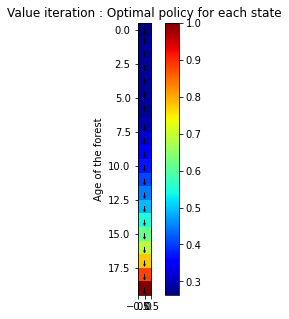

In [159]:
# Value function and policy visualization

list_X, list_Y = np.meshgrid(np.linspace(0, size-1, size), np.linspace(0, size-1, size))
value_l = list(vi_l.V)
list_Z = []
for i in range(len(value_l)):
    list_Z.append(value_l[i]/max(value_l))
    if list_Z[i]==0:
        list_Z[i]= -0.2
list_Z_norm = np.reshape(list_Z,(size,1))

print('Optimal value function :')
print(np.reshape(vi_l.V,(size,1)))

arrows = {1:(0,-1), 0:(0,1)}
scale = 0.25

ar_s =  np.reshape(vi_l.policy,(size,1))
print('Optimal policy :')
print(ar_s)

fig, ax = plt.subplots(figsize=(5, 5))
w = ax.invert_yaxis()
ax.set_title('Value iteration : Optimal policy for each state')
ax.set_ylabel('Age of the forest')
pos = ax.imshow(list_Z_norm,interpolation='none',cmap=plt.cm.jet)
for r, row in enumerate(ar_s):
    for c, cell in enumerate(row):
        if c != size-1 or r != size-1 :
            plot = plt.arrow(c, r, scale*arrows[cell][0], scale*arrows[cell][1], head_width=0.1)
plot = ax.imshow(list_Z_norm,interpolation='none',cmap=plt.cm.jet)
fig.colorbar(pos, ax=ax)
plt.show()

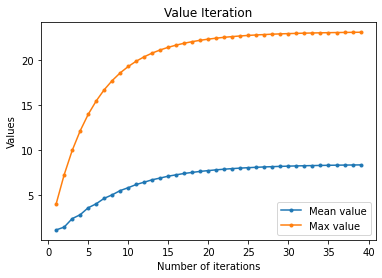

In [145]:
# Value vs iteration

list_meanV_VI_l = []
list_maxV_VI_l = []
list_iteration_VI_l = []
for i in range(len(vi_l.run_stats)):
    list_meanV_VI_l.append(vi_l.run_stats[i].get('Mean V'))
    list_maxV_VI_l.append(vi_l.run_stats[i].get('Max V'))
    list_iteration_VI_l.append(vi_l.run_stats[i].get('Iteration'))

fig, ax = plt.subplots()
ax.set_title('Value Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Values')
ax.plot(list_iteration_VI_l, list_meanV_VI_l, marker ='.', label="Mean value")
ax.plot(list_iteration_VI_l, list_maxV_VI_l, marker=".", label="Max value")
ax.legend()
plt.show()

In [168]:
# Policy Iteration

pi_l = mdp.PolicyIteration(P_l, R_l, 0.95, eval_type = 1)
pi_l.run()
print('The number of iterations taken to complete the computation. :',pi_l.iter)
print('The amount of CPU time used to run the algorithm :',pi_l.time)

The number of iterations taken to complete the computation. : 13
The amount of CPU time used to run the algorithm : 0.02812480926513672


Optimal value function :
[[ 9.21823188]
 [ 9.75731544]
 [ 9.75731544]
 [ 9.75731544]
 [ 9.75731544]
 [ 9.75731544]
 [ 9.75731544]
 [10.24952949]
 [10.96351148]
 [11.79857813]
 [12.77526426]
 [13.91758723]
 [15.25363749]
 [16.81626937]
 [18.64390899]
 [20.78149919]
 [23.28160469]
 [26.20570469]
 [29.62570469]
 [33.62570469]]
Optimal policy :
[[0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


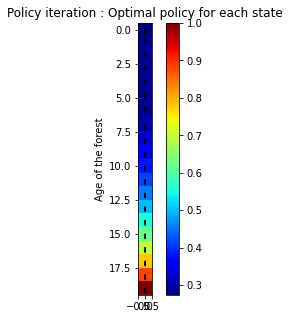

In [169]:
# Value function and policy visualization

list_X, list_Y = np.meshgrid(np.linspace(0, size-1, size), np.linspace(0, size-1, size))
value_l = list(pi_l.V)
list_Z = []
for i in range(len(value_l)):
    list_Z.append(value_l[i]/max(value_l))
    if list_Z[i]==0:
        list_Z[i]= -0.2
list_Z_norm = np.reshape(list_Z,(size,1))

print('Optimal value function :')
print(np.reshape(pi_l.V,(size,1)))

arrows = {1:(0,-1), 0:(0,1)}
scale = 0.25

ar_s =  np.reshape(pi_l.policy,(size,1))
print('Optimal policy :')
print(ar_s)

fig, ax = plt.subplots(figsize=(5, 5))
w = ax.invert_yaxis()
ax.set_title('Policy iteration : Optimal policy for each state')
ax.set_ylabel('Age of the forest')
pos = ax.imshow(list_Z_norm,interpolation='none',cmap=plt.cm.jet)
for r, row in enumerate(ar_s):
    for c, cell in enumerate(row):
        if c != size-1 or r != size-1 :
            plot = plt.arrow(c, r, scale*arrows[cell][0], scale*arrows[cell][1], head_width=0.1)
plot = ax.imshow(list_Z_norm,interpolation='none',cmap=plt.cm.jet)
fig.colorbar(pos, ax=ax)
plt.show()

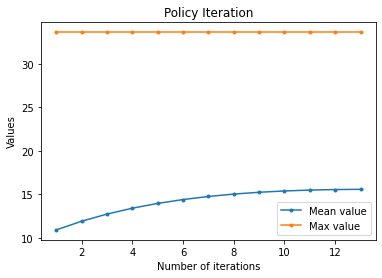

In [170]:
# Convergence plot : Max value vs Iteration

list_meanV_PI_l = []
list_maxV_PI_l = []
list_iteration_PI_l = []
for i in range(len(pi_l.run_stats)):
    list_meanV_PI_l.append(pi_l.run_stats[i].get('Mean V'))
    list_maxV_PI_l.append(pi_l.run_stats[i].get('Max V'))
    list_iteration_PI_l.append(pi_l.run_stats[i].get('Iteration'))

fig, ax = plt.subplots()
ax.set_title('Policy Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Values')
ax.plot(list_iteration_PI_l, list_meanV_PI_l, marker ='.', label="Mean value")
ax.plot(list_iteration_PI_l, list_maxV_PI_l, marker=".", label="Max value")
ax.legend()
plt.show()

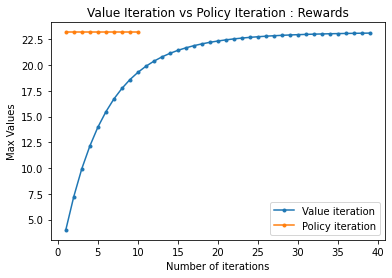

In [149]:
# Value iteration vs policy iteration : Max value
list_maxV_VI_l = []
list_maxV_PI_l = []
list_iteration_VI_l = []
list_iteration_PI_l = []
for i in range(len(pi_l.run_stats)):
    list_maxV_PI_l.append(pi_l.run_stats[i].get('Max V'))
    list_iteration_PI_l.append(pi_l.run_stats[i].get('Iteration'))

for i in range(len(vi_l.run_stats)):
    list_maxV_VI_l.append(vi_l.run_stats[i].get('Max V'))
    list_iteration_VI_l.append(vi_l.run_stats[i].get('Iteration'))
    
fig, ax = plt.subplots()
ax.set_title('Value Iteration vs Policy Iteration : Rewards')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Max Values')
ax.plot(list_iteration_VI_l, list_maxV_VI_l, marker ='.', label="Value iteration")
ax.plot(list_iteration_PI_l, list_maxV_PI_l, marker=".", label="Policy iteration")
ax.legend()
plt.show()

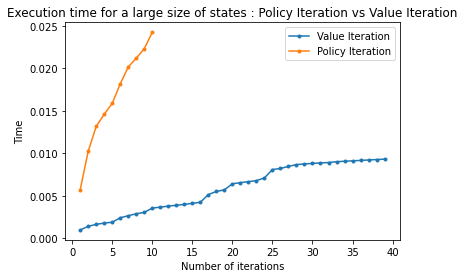

In [150]:
# Value iteration vs policy iteration : Time

list_time_VI_l = []
list_time_pi_l = []
list_iteration_pi_l = []
list_iteration_VI_l = []
for i in range(len(vi_l.run_stats)):
    list_time_VI_l.append(vi_l.run_stats[i].get('Time'))
    list_iteration_VI_l.append(vi_l.run_stats[i].get('Iteration'))
    
for i in range(len(pi_l.run_stats)):
    list_iteration_pi_l.append(pi_l.run_stats[i].get('Iteration'))
    list_time_pi_l.append(pi_l.run_stats[i].get('Time'))

fig, ax = plt.subplots()
ax.set_title('Execution time for a large size of states : Policy Iteration vs Value Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Time')
ax.plot(list_iteration_VI_l, list_time_VI_l, marker ='.', label="Value Iteration")
ax.plot(list_iteration_pi_l, list_time_pi_l, marker=".", label="Policy Iteration")
ax.legend()
plt.show()

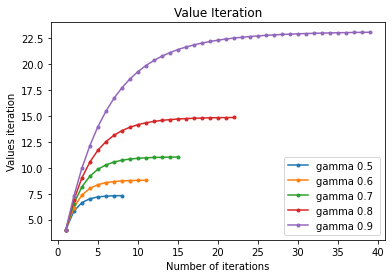

In [100]:
# Value function vs number of iteration with gamma = 0.5 to 0.9

n_gamma = 5
delta_gamma = 0.1
list_maxV_VI = [[]for i in range(n_gamma)]
list_iterations_VI=[[]for i in range(n_gamma)]


for i in range(n_gamma):
    vi_l = mdp.ValueIteration(P_l, R_l, 0.5+i*delta_gamma)
    vi_l.run()
    for j in range(len(vi_l.run_stats)):
        list_maxV_VI[i].append(vi_l.run_stats[j].get('Max V'))
        list_iterations_VI[i].append(vi_l.run_stats[j].get('Iteration'))
        
fig, ax = plt.subplots()
ax.set_title('Value Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Values iteration')
for i in range(n_gamma):
    ax.plot(list_iterations_VI[i], list_maxV_VI[i], marker=".", label='gamma {} '.format(0.5+i*delta_gamma))
ax.legend()
plt.show()

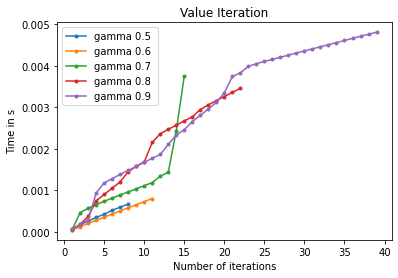

In [101]:
# Execution time vs number of iteration with gamma = 0.5 to 0.9

n_gamma = 5
delta_gamma = 0.1
list_iterations_VI=[[]for i in range(n_gamma)]
list_time_VI=[[]for i in range(n_gamma)]


for i in range(n_gamma):
    vi_l = mdp.ValueIteration(P_l, R_l, 0.5+i*delta_gamma)
    vi_l.run()
    for j in range(len(vi_l.run_stats)):
        list_iterations_VI[i].append(vi_l.run_stats[j].get('Iteration'))
        list_time_VI[i].append(vi_l.run_stats[j].get('Time'))
        
fig, ax = plt.subplots()
ax.set_title('Value Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Time in s')
for i in range(n_gamma):
    ax.plot(list_iterations_VI[i], list_time_VI[i], marker=".", label='gamma {} '.format(0.5+i*delta_gamma))
ax.legend()
plt.show()

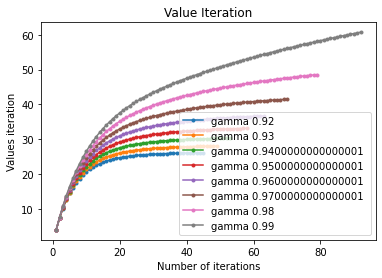

In [155]:
# value function vs number of iterations with gamma = 0.9 to 0.99

n_gamma = 10
delta_gamma = 0.01
list_maxV_VI = [[]for i in range(n_gamma)]
list_iterations_VI=[[]for i in range(n_gamma)]


for i in range(n_gamma):
    vi_l = mdp.ValueIteration(P_l, R_l, 0.9+i*delta_gamma)
    vi_l.run()
    for j in range(len(vi_l.run_stats)):
        list_maxV_VI[i].append(vi_l.run_stats[j].get('Max V'))
        list_iterations_VI[i].append(vi_l.run_stats[j].get('Iteration'))
        
fig, ax = plt.subplots()
ax.set_title('Value Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Values iteration')
for i in range(n_gamma-2):
    ax.plot(list_iterations_VI[i+2], list_maxV_VI[i+2], marker=".", label='gamma {} '.format(0.92+i*delta_gamma))
ax.legend()
plt.show()

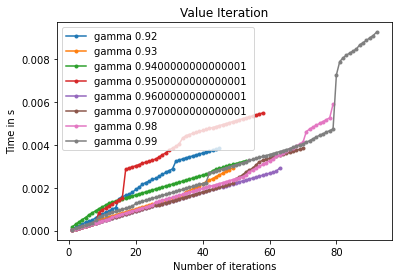

In [157]:
# execution time vs number of iterations with gamma = 0.9 to 0.99

n_gamma = 10
delta_gamma = 0.01
list_iterations_VI=[[]for i in range(n_gamma)]
list_time_VI=[[]for i in range(n_gamma)]


for i in range(n_gamma):
    vi_l = mdp.ValueIteration(P_l, R_l, 0.9+i*delta_gamma)
    vi_l.run()
    for j in range(len(vi_l.run_stats)):
        list_iterations_VI[i].append(vi_l.run_stats[j].get('Iteration'))
        list_time_VI[i].append(vi_l.run_stats[j].get('Time'))
        
fig, ax = plt.subplots()
ax.set_title('Value Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Time in s')
for i in range(n_gamma-2):
    ax.plot(list_iterations_VI[i+2], list_time_VI[i+2], marker=".", label='gamma {} '.format(0.92+i*delta_gamma))
ax.legend()
plt.show()

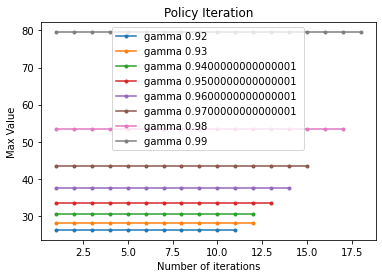

In [162]:
# policy vs number of iterations with gamma = 0.5 to 0.9

n_gamma = 10
delta_gamma = 0.01
list_maxV_PI = [[]for i in range(n_gamma)]
list_iterations_PI=[[]for i in range(n_gamma)]
list_time_PI=[[]for i in range(n_gamma)]


for i in range(n_gamma):
    pi_l = mdp.PolicyIteration(P_l, R_l, 0.9+i*delta_gamma)
    pi_l.run()
    for j in range(len(pi_l.run_stats)):
        list_maxV_PI[i].append(pi_l.run_stats[j].get('Max V'))
        list_iterations_PI[i].append(pi_l.run_stats[j].get('Iteration'))
        list_time_PI[i].append(pi_l.run_stats[j].get('Time'))
        
fig, ax = plt.subplots()
ax.set_title('Policy Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Max Value')
for i in range(n_gamma-2):
    ax.plot(list_iterations_PI[i+2], list_maxV_PI[i+2], marker=".", label='gamma {} '.format(0.92+i*delta_gamma))
ax.legend()
plt.show()

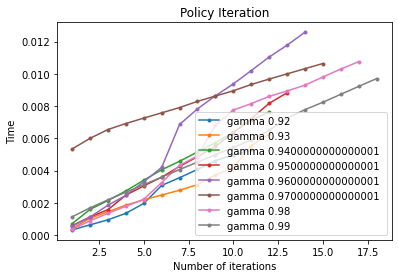

In [160]:
# execution time vs number of iterations with gamma = 0.9 to 0.99

n_gamma = 10
delta_gamma = 0.01
list_iterations_PI=[[]for i in range(n_gamma)]
list_time_PI=[[]for i in range(n_gamma)]


for i in range(n_gamma):
    pi_l = mdp.PolicyIteration(P_l, R_l, 0.9+i*delta_gamma)
    pi_l.run()
    for j in range(len(pi_l.run_stats)):
        list_iterations_PI[i].append(pi_l.run_stats[j].get('Iteration'))
        list_time_PI[i].append(pi_l.run_stats[j].get('Time'))
        
fig, ax = plt.subplots()
ax.set_title('Policy Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Time')
for i in range(n_gamma-2):
    ax.plot(list_iterations_PI[i+2], list_time_PI[i+2], marker=".", label='gamma {} '.format(0.92+i*delta_gamma))
ax.legend()
plt.show()